# Springboard Capstone Project 1 - Portfolio Optimization


## Goal for the project: 
- To present the optimal portfolio to investors and investing companies.

## How to acquire the data:
- I will use the "Adjusted closing price" from Yahoo Finance.
- Data Range: 1/1/2006 to 12/31/2019

## Method and Solution:
- Modern portfolio theory (MPT) is all about assembling a portfolio that maximizes expected return for a set level of risk. MPT assumes that investors are risk-averse, meaning that given two portfolios that offer the same expected return, investors will prefer the less risky one. Thus, an investor will take on increased risk only if compensated by higher expected returns.
- Another factor comes in to play in MPT is “diversification”. Modern portfolio theory says that it is not enough to look at the expected risk and return of one particular stock. By investing in more than one stock, an investor can reap the benefits of diversification — chief among them, a reduction in the riskiness of the portfolio.


In [2]:
#Monte Carlo Simulation for Optimization Search

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from scipy import stats
import seaborn as sns
from tabulate import tabulate
%matplotlib inline

In [4]:
tickers = ['AAPL', 'CSCO', 'IBM', 'AMZN', 'MSFT','V']
price_data = web.get_data_yahoo(tickers,
                               start = '2006-01-01',
                               end = '2019-12-31')
price_data = price_data['Adj Close']

In [5]:
#aapl = pd.read_csv('Desktop/Springboard/AAPL.csv',index_col='Date',parse_dates=True)
#cisco = pd.read_csv('Desktop/Springboard/CSCO.csv',index_col='Date',parse_dates=True)
#ibm = pd.read_csv('Desktop/Springboard/IBM.csv',index_col='Date',parse_dates=True)
#amzn = pd.read_csv('Desktop/Springboard/AMZN.csv',index_col='Date',parse_dates=True)
#msft = pd.read_csv('Desktop/Springboard/MSFT.csv',index_col='Date',parse_dates=True)
#visa = pd.read_csv('Desktop/Springboard/v.csv',index_col='Date',parse_dates=True)

In [6]:
#stocks = pd.concat([aapl,cisco,ibm,amzn,msft,visa],axis=1)
#stocks.columns = ['aapl','cisco','ibm','amzn','msft','visa']

In [7]:
price_data.head()

Symbols,AAPL,AMZN,CSCO,IBM,MSFT,V
Date,,,,,,
2006-01-03,9.269435,47.580002,13.381426,55.763287,19.657124,NaN
2006-01-04,9.296719,47.250000,13.688161,55.688545,19.752342,NaN
2006-01-05,9.223555,47.650002,14.071590,56.062294,19.766989,NaN
2006-01-06,9.461646,47.869999,14.393659,57.727161,19.708401,NaN
2006-01-09,9.430640,47.080002,14.616045,56.898148,19.671768,NaN


In [8]:
# Mean Daily Return
price_data.pct_change(1).mean()


Symbols
AAPL    0.001181
AMZN    0.001333
CSCO    0.000521
IBM     0.000339
MSFT    0.000730
V       0.001120
dtype: float64

In [9]:
price_data.pct_change(1).corr()

Symbols,AAPL,AMZN,CSCO,IBM,MSFT,V
Symbols,,,,,,
AAPL,1.000000,0.434518,0.471804,0.446622,0.463115,0.458443
AMZN,0.434518,1.000000,0.429882,0.405514,0.485681,0.463166
CSCO,0.471804,0.429882,1.000000,0.548351,0.575420,0.478098
IBM,0.446622,0.405514,0.548351,1.000000,0.527498,0.451956
MSFT,0.463115,0.485681,0.575420,0.527498,1.000000,0.469755
V,0.458443,0.463166,0.478098,0.451956,0.469755,1.000000


## Log Returns vs Arithmetic Returns
- Most technical analysis technques require detrending or normalizing the time series.
- Using log returns is a nice way to do that.

- For this project, these two returns won't make a big difference. We will just use log return for the project.

In [10]:
# Arithmetic Return
price_data.pct_change(1).head()

Symbols,AAPL,AMZN,CSCO,IBM,MSFT,V
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.002943,-0.006936,0.022922,-0.001340,0.004844,NaN
2006-01-05,-0.007870,0.008466,0.028012,0.006711,0.000742,NaN
2006-01-06,0.025813,0.004617,0.022888,0.029697,-0.002964,NaN
2006-01-09,-0.003277,-0.016503,0.015450,-0.014361,-0.001859,NaN


In [11]:
# Log Return
log_ret = np.log(price_data/price_data.shift(1))
log_ret.head()

Symbols,AAPL,AMZN,CSCO,IBM,MSFT,V
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.002939,-0.006960,0.022664,-0.001341,0.004832,NaN
2006-01-05,-0.007901,0.008430,0.027627,0.006689,0.000741,NaN
2006-01-06,0.025486,0.004606,0.022630,0.029264,-0.002968,NaN
2006-01-09,-0.003282,-0.016641,0.015332,-0.014465,-0.001860,NaN


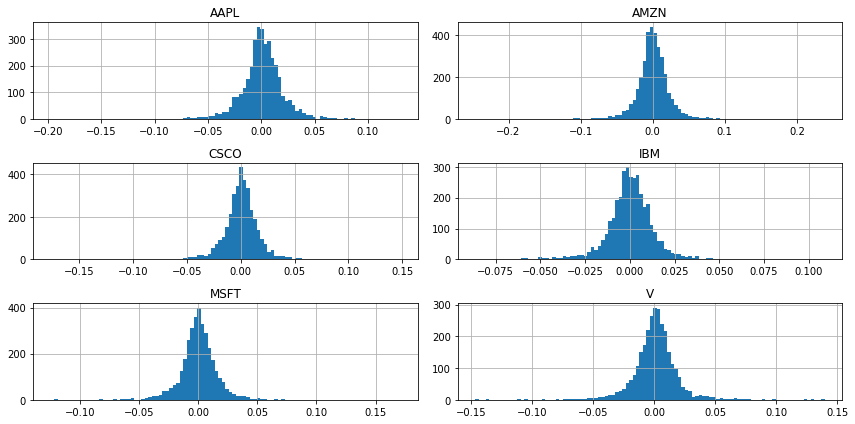

In [12]:
# Log Return histgrams
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [13]:
log_ret.mean()

Symbols
AAPL    0.000980
AMZN    0.001039
CSCO    0.000358
IBM     0.000246
MSFT    0.000590
V       0.000951
dtype: float64

In [14]:
# Compute pairwise covariance of columns
log_ret.cov()

Symbols,AAPL,AMZN,CSCO,IBM,MSFT,V
Symbols,,,,,,
AAPL,0.000401,0.000212,0.000171,0.000122,0.000155,0.000159
AMZN,0.000212,0.000583,0.000189,0.000134,0.000196,0.000199
CSCO,0.000171,0.000189,0.000326,0.000135,0.000173,0.000159
IBM,0.000122,0.000134,0.000135,0.000186,0.000120,0.000116
MSFT,0.000155,0.000196,0.000173,0.000120,0.000278,0.000147
V,0.000159,0.000199,0.000159,0.000116,0.000147,0.000338


In [15]:
log_ret.cov()*252 # multiply by days

Symbols,AAPL,AMZN,CSCO,IBM,MSFT,V
Symbols,,,,,,
AAPL,0.101088,0.053493,0.043013,0.030687,0.039030,0.040179
AMZN,0.053493,0.146914,0.047719,0.033891,0.049500,0.050121
CSCO,0.043013,0.047719,0.082263,0.033937,0.043576,0.039944
IBM,0.030687,0.033891,0.033937,0.046755,0.030219,0.029110
MSFT,0.039030,0.049500,0.043576,0.030219,0.070166,0.037139
V,0.040179,0.050121,0.039944,0.029110,0.037139,0.085071


# Single Run for Some Random Allocation


In [16]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(price_data.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(6))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['AAPL', 'AMZN', 'CSCO', 'IBM', 'MSFT', 'V'], dtype='object', name='Symbols')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686]


Rebalance to sum to 1.0
[0.18401825 0.20335695 0.01014677 0.06112161 0.24419792 0.2971585 ]


Expected Portfolio Return
0.21096813950216284


Expected Volatility
0.23237084573135564


Sharpe Ratio
0.9078941845659222


## Repeat single run for thousands of times
- Let's say the number of possible positions (or number of actual portfolios) is 5000.
- Step 1: Get the maximum Sharpe Ratio and it's index location from the 5000 portfolios
- Step 2: Pass the index location to the model
- Step 3: Put a red dot for the max Sharpe ratio (That is, find the max Sharpe return and max Sharpe Volitility.)

In [17]:
np.random.seed(101)
num_ports = 5000

all_weights = np.zeros((num_ports,len(price_data.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(6))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [18]:
# The maximum Sharpe ratio
sharpe_arr.max()

0.9529438952912254

In [19]:
# Return the best index location of Sharpe ratio
sharpe_arr.argmax()

4730

In [20]:
# Take the best index location and pass it in the location

all_weights[4730,:]

array([0.32122232, 0.14385507, 0.00239324, 0.01638349, 0.15548085,
       0.36066502])

In [21]:
max_sr_ret = ret_arr[4730]
max_sr_vol = vol_arr[4730]

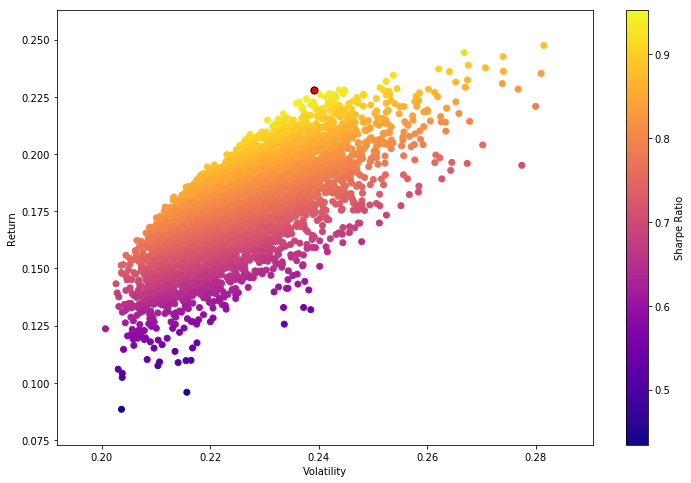

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

## Efficient Frontier
### Mathematical Optimization


In [23]:
# Functionalize Return and SR operations


In [24]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [25]:
from scipy.optimize import minimize

In [26]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [27]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [28]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [29]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [30]:
# Initial Guess (equal distribution)
init_guess = [0.166,0.166,0.166,0.166,0.166,0.17]

In [31]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [32]:
opt_results

     fun: -0.9706396185303401
     jac: array([ 2.36034393e-05,  3.43844295e-05,  2.84521662e-01,  2.15895131e-01,
        1.68204233e-02, -3.17096710e-05])
 message: 'Optimization terminated successfully.'
    nfev: 40
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([3.62101107e-01, 1.76654456e-01, 2.32561366e-17, 6.60279123e-17,
       1.34983170e-17, 4.61244437e-01])

In [33]:
opt_results.x

array([3.62101107e-01, 1.76654456e-01, 2.32561366e-17, 6.60279123e-17,
       1.34983170e-17, 4.61244437e-01])

In [34]:
get_ret_vol_sr(opt_results.x)

array([0.24626376, 0.25371287, 0.97063962])

In [35]:
# All Optimal Portfolios (Efficient Frontier)


In [36]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) # Change 100 to a lower number for slower computers!

In [37]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [38]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

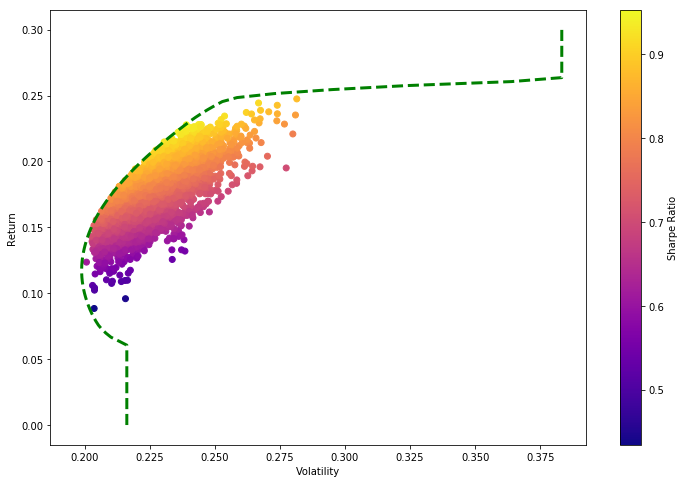

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

# Statistical Reference
From the above, we learn how to get the efficient frontier for our portfolios. Next, I will calculate alpha, beta, and Value at Risk for the portfolios by using statistical methods.

## Beta & Capital Asset Pricing Model (CAPM)
First, I will discuss alpha and beta for the Capital Asset Pricing Model (CAPM) Model. The goal of the CAPM formula is to evaluate whether a stock is fairly valued when its risk and the time value of money are compared to its expected return.
The formula for calculating the expected return of an asset given its risk is as follows:
* ERi​=Rf​+βi​(ERm​−Rf​)
* where:
* ERi​=expected return of investment
* Rf​=risk-free rate
* βi​=beta of the investment
* (ERm​−Rf​) = market risk premium​

The beta of a potential investment is a measure of how much risk the investment will add to a portfolio that looks like the market. If a stock is riskier than the market, it will have a beta greater than one. If a stock has a beta of less than one, the formula assumes it will reduce the risk of a portfolio.


## What is Alpha?
* Alpha is a measure of the performance of an investment as compared to a suitable market index, such as the S&P 500. An alpha of one (the baseline value is zero) shows that the return on the investment during a specified time frame outperformed the overall market average by 1%. A negative alpha number reflects an investment that is underperforming as compared to the market average.


* Alpha is one of five standard performance ratios that are commonly used to evaluate individual stocks or an investment portfolio, with the other four being beta, standard deviation, R-squared, and the Sharpe ratio. Alpha is usually a single number (e.g., 1 or 4), and is expressed as a percentage that reflects how an investment performed relative to a benchmark index.


* A positive alpha of 5 (+5) means that the portfolio’s return exceeded the benchmark index’s performance by 5%. An alpha of negative 5 (-5) indicates that the portfolio underperformed the benchmark index by 5%. An alpha of zero means that the investment earned a return that matched the overall market return as reflected by the selected benchmark index.


* The alpha of a portfolio is the excess return it produces compared to the index. Investors in mutual funds or ETFs often look for a fund with a high alpha in hopes of getting a superior return on investment (ROI).


* The alpha ratio is often used along with the beta coefficient, which is a measure of the volatility of an investment. The two ratios are both used in the Capital Assets Pricing Model (CAPM) to analyze a portfolio of investments and assess its theoretical performance.


## Value at Risk (VaR)
* Value at risk (VaR) is a statistic used to try and quantify the level of financial risk within a firm or portfolio over a specified time frame. VaR provides an estimate of the maximum loss from a given position or portfolio over a period of time, and you can calculate it across various confidence levels.


* Estimating the risk of a portfolio is important to long-term capital growth and risk management, particularly within larger firms or institutions. VaR is typically framed as something like this:


* "We have a portfolio VaR of 250,000 USD over the next month at 95% confidence"
This means that, with 95% confidence, we can say that the portfolio's loss will not exceed 250,000 USD in a month.


### How is VaR calculated?
There are two main ways to calculate VaR: Using Monte Carlo simulation or Using the variance-covariance method.


* I will focus on using variance-covariance method. In short, the variance-covariance method looks at historical price movements (standard deviation, mean price) of a given equity or portfolio of equities over a specified lookback period, and then uses probability theory to calculate the maximum loss within your specified confidence interval.


### VaR calculation Assumptions
* 1.Normal distribution of returns - VaR assumes the returns of the portfolio are normally distributed. This is of course not realistic for most assets, but allows us to develop a baseline using a much more simplistic calculation.
(Modifications can be made to VaR to account for different distributions, but here we'll focus on the standard VaR calculation)


* 2.Standard market conditions - Like many financial instruments, VaR is best used for considering loss in standard markets, and is not well-suited for extreme/outlier events.


# Codes and Calculation

### To calculate beta and alpha for the portfolio:
- step 1: Calculate the portfolio daily return
- step 2: Calculate the benchmark return
- step 3: Check the correlation for the benchmark and portfolio
- step 4: Since our portfolio returns are highly correlated to the benchmark returns, we can use the regression model to calculate the portfolio beta and the portfolio alpha. 
- step 5: Use the linear regression model to calculate the alpha and the beta.

In [51]:
# Step 1
# calculate the daily returns for our assets
ret_data = price_data.pct_change()[1:]

In [57]:
# The weights of our portfolio
wts = np.array([0.32122232, 0.14385507, 0.00239324, 0.01638349, 0.15548085, 0.36066502])

In [43]:
# calculate the portfolio returns
port_ret = (ret_data * wts).sum(axis = 1)
port_ret.head()

Date
2006-01-04    0.000734
2006-01-05   -0.001018
2006-01-06    0.009036
2006-01-09   -0.003914
2006-01-10    0.016813
dtype: float64

In [44]:
# regress the portfolio returns against the benchmark returns. 
# To do that we will use VGT as our benchmark and calculate its returns.

benchmark_price = web.get_data_yahoo('VGT',
                               start = '2006-01-01',
                               end = '2019-12-31')
                               
benchmark_ret = benchmark_price["Adj Close"].pct_change()[1:]

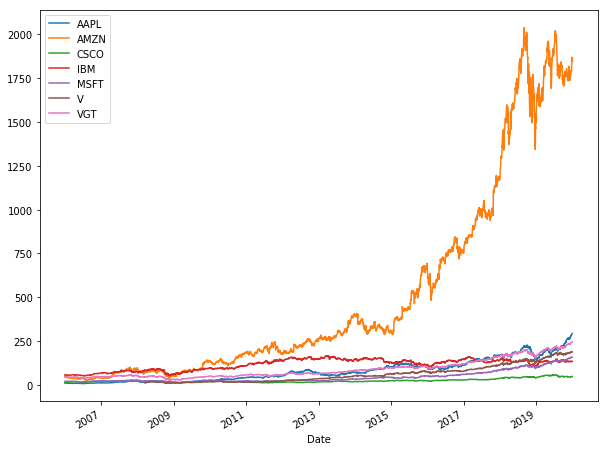

In [45]:
price_data.plot(label='Portfolio',figsize=(10,8))
benchmark_price['Adj Close'].plot(label='VGT')
plt.legend()

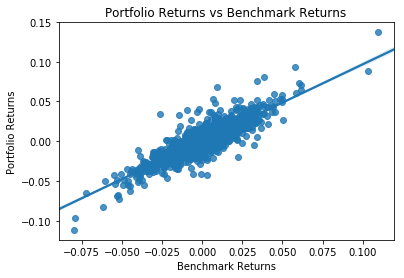

In [46]:
# visualize the scatter plot of our portfolio returns versus benchmark returns

sns.regplot(benchmark_ret.values,port_ret.values)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()

In [47]:
# Our portfolio returns are highly correlated to the benchmark returns. 
# We can use the regression model to calculate the portfolio beta and the portfolio alpha. 
# We will use the linear regression model to calculate the alpha and the beta.

In [48]:
(beta, alpha) = stats.linregress(benchmark_ret.values,
                port_ret.values)[0:2]
                
print("The portfolio beta is", round(beta, 4))

The portfolio beta is 0.9629


In [49]:
print("The portfolio alpha is", round(alpha,5))

The portfolio alpha is 0.00048


# To calculate the VaR of a portfolio:
* Step 1: Calculate periodic returns of the stocks in the portfolio
* Step 2: Create a covariance matrix based on the returns
* Step 3: Calculate the portfolio mean and standard deviation (weighted based on investment levels of each stock in portfolio)
* Step 4: Calculate the inverse of the normal cumulative distribution (PPF) with a specified confidence interval, standard deviation, and mean
* Step 5: Estimate the value at risk (VaR) for the portfolio by subtracting the initial investment from the calculation in step (4)


In [50]:
# Calculate VaR
# Set an initial investment level = 1M
initial_investment = 1000000

In [52]:
# Daily Return
ret_data.tail()

Symbols,AAPL,AMZN,CSCO,IBM,MSFT,V
Date,,,,,,
2019-12-24,0.000951,-0.002114,-0.006653,-0.004205,-0.000191,0.002619
2019-12-26,0.019840,0.044467,0.001465,-0.000519,0.008197,0.008477
2019-12-27,-0.000380,0.000551,-0.001672,0.002668,0.001828,0.001216
2019-12-30,0.005935,-0.012253,-0.003768,-0.018186,-0.008619,-0.008237
2019-12-31,0.007306,0.000514,0.007775,0.009261,0.000698,0.000373


In [53]:
# Create a covariance matrix based on the returns
# Generate Var-Cov matrix

# This will allow us to calculate the standard deviation and mean of returns across the entire portfolio.

cov_matrix = ret_data.cov()
cov_matrix

Symbols,AAPL,AMZN,CSCO,IBM,MSFT,V
Symbols,,,,,,
AAPL,0.000400,0.000212,0.000170,0.000122,0.000155,0.000160
AMZN,0.000212,0.000596,0.000189,0.000135,0.000198,0.000199
CSCO,0.000170,0.000189,0.000326,0.000135,0.000174,0.000159
IBM,0.000122,0.000135,0.000135,0.000185,0.000120,0.000115
MSFT,0.000155,0.000198,0.000174,0.000120,0.000280,0.000148
V,0.000160,0.000199,0.000159,0.000115,0.000148,0.000339


In [54]:
# Calculate the portfolio mean and standard deviation

# Calculate mean returns for each stock
avg_rets = ret_data.mean()

In [55]:
# Calculate mean returns for portfolio overall, 
# using dot product to normalize individual means against investment weights
port_mean = avg_rets.dot(wts)
port_mean

0.001095594065730016

In [59]:
# Calculate portfolio standard deviation
port_stdev = np.sqrt(wts.T.dot(cov_matrix).dot(wts))
port_stdev

0.015077782409531294

In [60]:
# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment
mean_investment

1001095.59406573

In [61]:
# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev
stdev_investment

15077.782409531294

In [62]:
# Calculate the inverse of the normal cumulative distribution (PPF) 
# with a specified confidence interval, standard deviation, and mean

# Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
# as calculated above
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [63]:
#Finally, we can calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
var_1d1


23705.151016972726

#### Here we can say that with 95% confidence that our portfolio of 1M USD will not exceed losses greater than 23K USD over a one day period.


In [64]:
VaR_90 = norm.ppf(1-0.9, mean_investment, stdev_investment)
VaR_95 = norm.ppf(1-0.95, mean_investment, stdev_investment)
VaR_99 = norm.ppf(1-0.99, mean_investment, stdev_investment)

print(tabulate([['90%',VaR_90], ['95%',VaR_95], ['99%',VaR_99]], headers=['Confidence Level','Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                          981773
95%                          976295
99%                          966019
